<a href="https://colab.research.google.com/github/yasirusman85/Agriculture-Project/blob/main/Agriculture_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
shankarpriya2913_crop_and_soil_dataset_path = kagglehub.dataset_download('shankarpriya2913/crop-and-soil-dataset')

print('Data source import complete.')


100%|██████████| 107k/107k [00:00<00:00, 67.2MB/s]

Extracting files...
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
import os

# Use the path variable created by the download
path = shankarpriya2913_crop_and_soil_dataset_path

for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('.csv'):
            print(os.path.join(dirname, filename))

/root/.cache/kagglehub/datasets/shankarpriya2913/crop-and-soil-dataset/versions/1/data_core.csv


DATASET OVERVIEW
Shape: (8000, 9)

Columns: ['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name']

Data Types:
Temparature        float64
Humidity           float64
Moisture           float64
Soil Type           object
Crop Type           object
Nitrogen             int64
Potassium            int64
Phosphorous          int64
Fertilizer Name     object
dtype: object

Missing Values:
Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

Duplicates: 0

SAMPLE DATA
   Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0         26.0      52.0      38.0     Sandy      Maize        37          0   
1         29.0      52.0      45.0     Loamy  Sugarcane        12          0   
2         34.0      65.0      62.0     Black     Cotton         7         

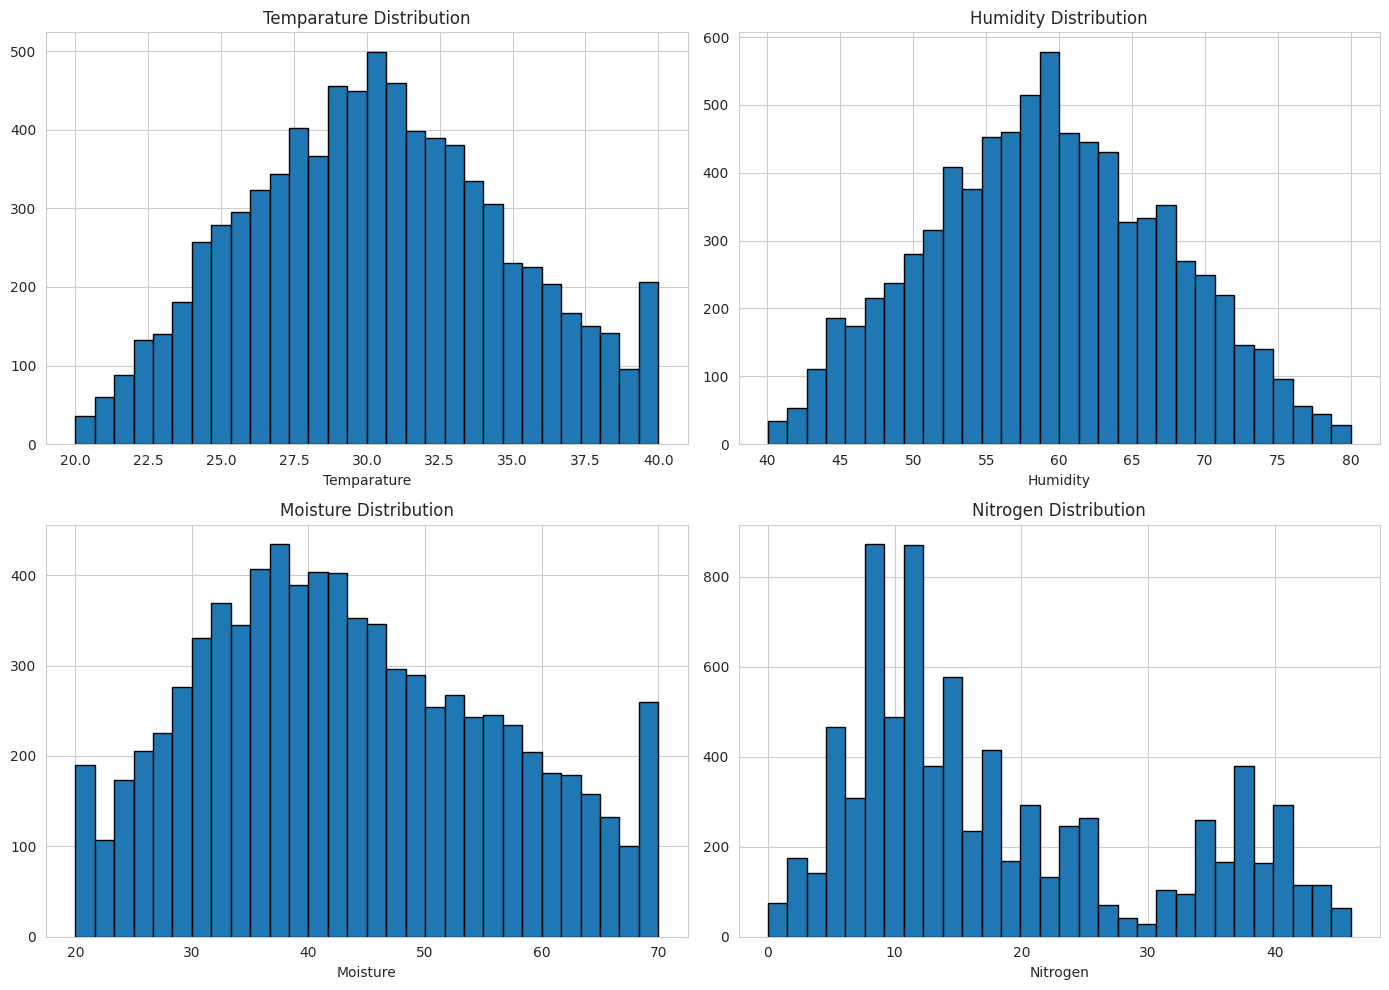

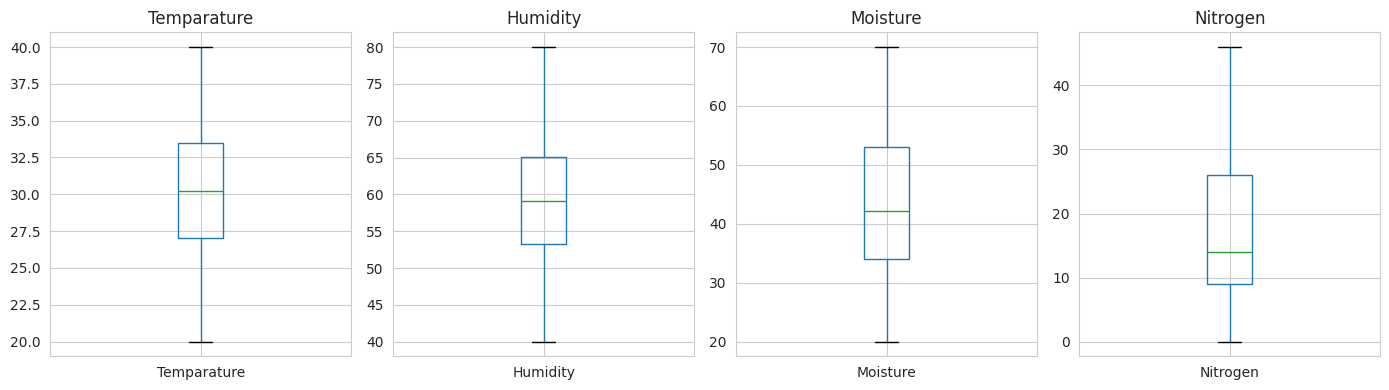

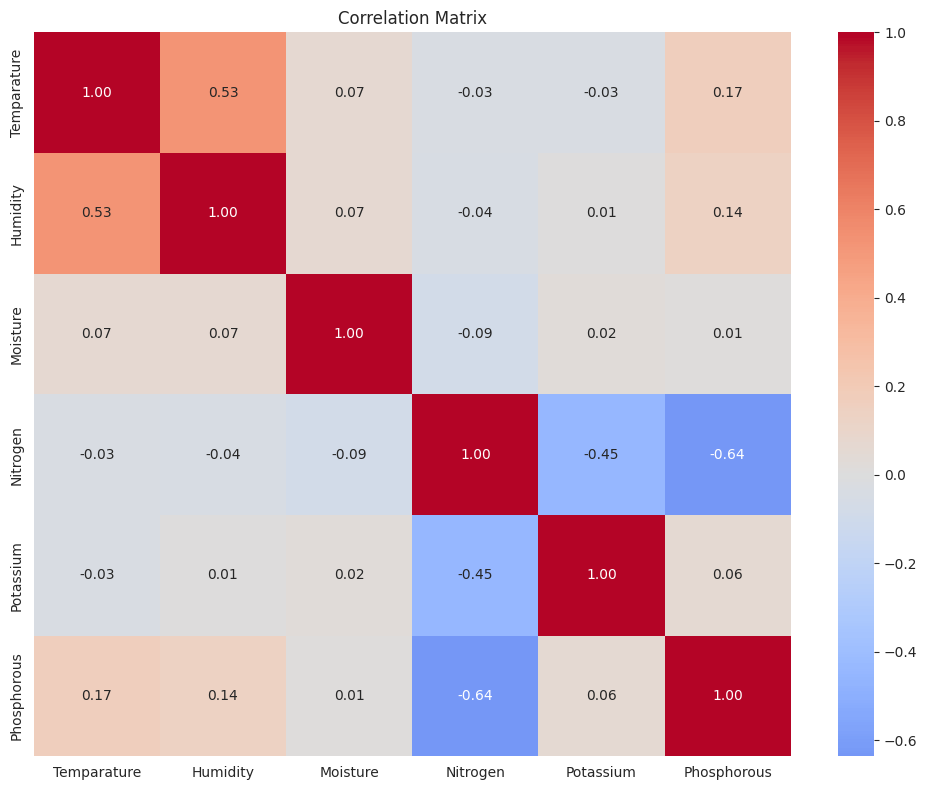

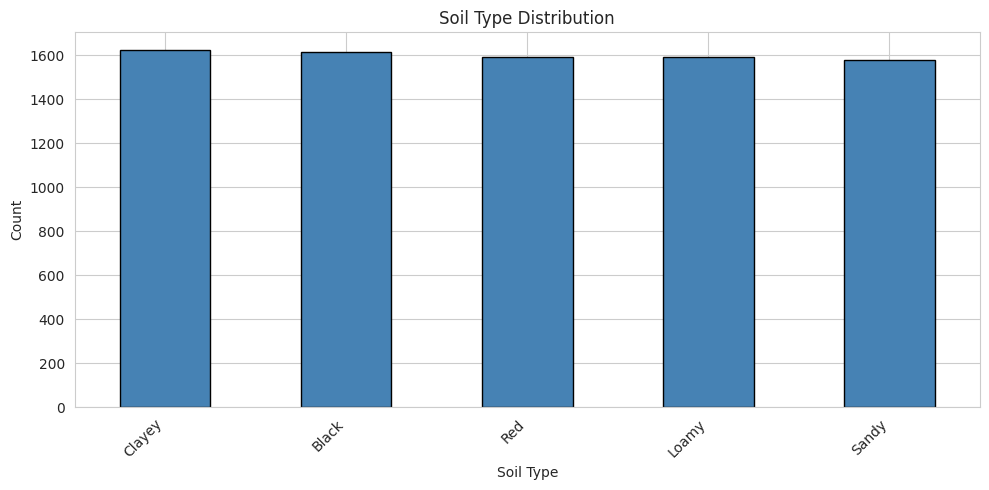

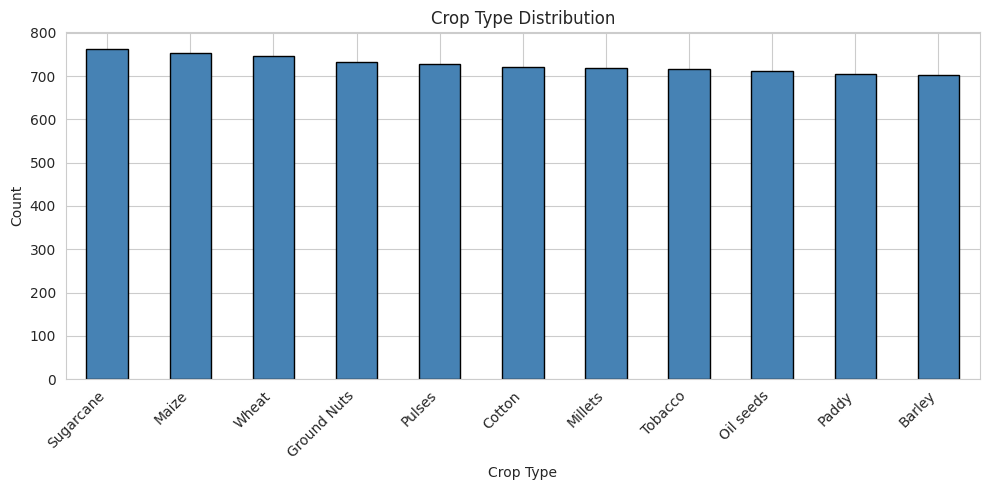

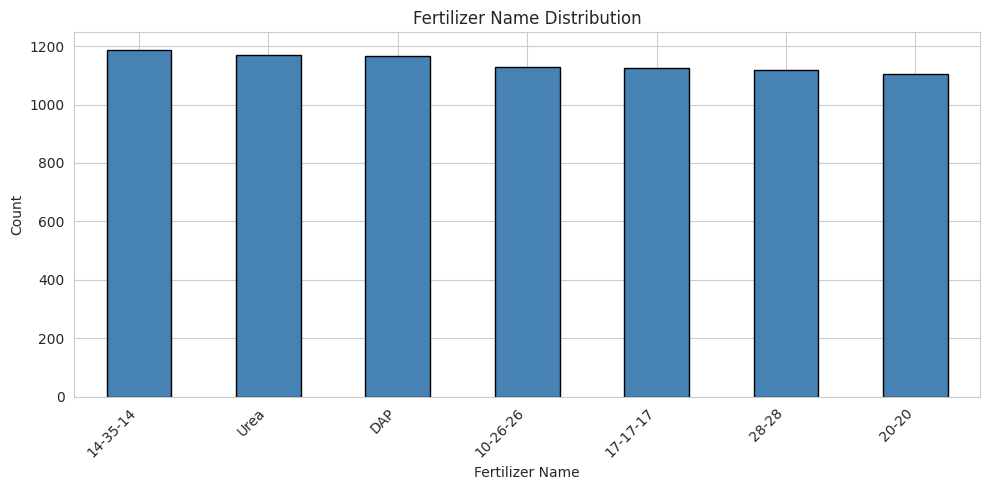


EDA COMPLETE


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('/root/.cache/kagglehub/datasets/shankarpriya2913/crop-and-soil-dataset/versions/1/data_core.csv')

# Basic info
print("="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nMissing Values:\n{df.isnull().sum()}")
print(f"\nDuplicates: {df.duplicated().sum()}")

# First & last rows
print("\n" + "="*50)
print("SAMPLE DATA")
print("="*50)
print(df.head(10))
print(df.tail(5))

# Statistics
print("\n" + "="*50)
print("NUMERICAL STATISTICS")
print("="*50)
print(df.describe())

# Categorical analysis
print("\n" + "="*50)
print("CATEGORICAL DISTRIBUTIONS")
print("="*50)
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")

# Visualizations
sns.set_style("whitegrid")

# 1. Numerical distributions
num_cols = df.select_dtypes(include=np.number).columns
if len(num_cols) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    for i, col in enumerate(num_cols[:4]):
        ax = axes[i//2, i%2]
        df[col].hist(bins=30, ax=ax, edgecolor='black')
        ax.set_title(f'{col} Distribution')
        ax.set_xlabel(col)
    plt.tight_layout()
    plt.show()

# 2. Boxplots
if len(num_cols) > 0:
    fig, axes = plt.subplots(1, min(4, len(num_cols)), figsize=(14, 4))
    if len(num_cols) == 1:
        axes = [axes]
    for i, col in enumerate(num_cols[:4]):
        df.boxplot(column=col, ax=axes[i])
        axes[i].set_title(f'{col}')
    plt.tight_layout()
    plt.show()

# 3. Correlation heatmap
if len(num_cols) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

# 4. Categorical bar plots
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols[:3]:
    plt.figure(figsize=(10, 5))
    df[col].value_counts().plot(kind='bar', color='steelblue', edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

print("\n" + "="*50)
print("EDA COMPLETE")
print("="*50)

Prepare Data for Transformer

In [12]:
import torch
from torch.utils.data import Dataset, DataLoader

# Encode categoricals
from sklearn.preprocessing import LabelEncoder

le_soil = LabelEncoder()
le_crop = LabelEncoder()
le_fert = LabelEncoder()

df['Soil_Encoded'] = le_soil.fit_transform(df['Soil Type'])
df['Crop_Encoded'] = le_crop.fit_transform(df['Crop Type'])
df['Fertilizer_Encoded'] = le_fert.fit_transform(df['Fertilizer Name'])

# Normalize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']
df[num_cols] = scaler.fit_transform(df[num_cols])

Custom Dataset Class

In [13]:
class FertilizerDataset(Dataset):
    def __init__(self, data, features, target):
        self.X = torch.FloatTensor(data[features].values)
        self.y = torch.LongTensor(data[target].values)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

Transformer Model

In [14]:
import torch.nn as nn

class FertilizerTransformer(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=4, num_layers=2):
        super().__init__()

        self.embedding = nn.Linear(input_dim, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model, nhead, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers)
        self.classifier = nn.Linear(d_model, num_classes)

    def forward(self, x):
        x = self.embedding(x).unsqueeze(1)  # Add sequence dimension
        x = self.transformer(x)
        x = x.squeeze(1)
        return self.classifier(x)

Train

In [15]:
from sklearn.model_selection import train_test_split

features = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous', 'Soil_Encoded', 'Crop_Encoded']
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_dataset = FertilizerDataset(train_df, features, 'Fertilizer_Encoded')
test_dataset = FertilizerDataset(test_df, features, 'Fertilizer_Encoded')

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

model = FertilizerTransformer(input_dim=8, num_classes=7)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(50):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

In [17]:
# EVALUATION CODE
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = 100 * correct / total
print(f'\n{"="*50}')
print(f'Test Accuracy: {accuracy:.2f}%')
print(f'Correct Predictions: {correct}/{total}')
print(f'{"="*50}')


Test Accuracy: 15.56%
Correct Predictions: 249/1600


In [19]:
# Move to GPU FIRST
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# CREATE model on GPU
model = FertilizerTransformer(input_dim=8, num_classes=7).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(50):
    model.train()
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/50] completed')

print("Training complete!")

Using device: cuda
Epoch [10/50] completed
Epoch [20/50] completed
Epoch [30/50] completed
Epoch [40/50] completed
Epoch [50/50] completed
Training complete!


In [20]:
# EVALUATION
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = 100 * correct / total
print(f'\n{"="*50}')
print(f'Test Accuracy: {accuracy:.2f}%')
print(f'Correct Predictions: {correct}/{total}')
print(f'{"="*50}')


Test Accuracy: 14.75%
Correct Predictions: 236/1600
